# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [ ]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [1]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd
from cv2 import imread
import keras.utils as image

import cv2
# from scipy.misc.pilutil import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [7]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

In [20]:
img_path = 'keyboard.jpg'

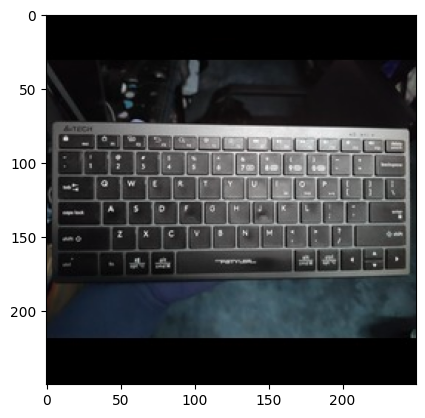

In [21]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [22]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [23]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [24]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 144ms/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.853339
1,n04264628,space_bar,0.051689
2,n03832673,notebook,0.041654
3,n03793489,mouse,0.014186
4,n04505470,typewriter_keyboard,0.011584
5,n03642806,laptop,0.008367
6,n02992529,cellular_telephone,0.003552
7,n06785654,crossword_puzzle,0.002229
8,n03584254,iPod,0.002156
9,n03777754,modem,0.001755


Interpret the result of prediction using VGG16 model

> The image that I have used is my keyboard. According to the predicted result, the model sees the image as a computer_keyboard with a probability of 85%. It also has a space_bar prediction which is a part of the keyboard with 5% probability.

Use Resnet50 pretrained model

In [25]:
# from keras.applications import resnet50
from keras.applications import resnet

resnet50_model = resnet.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Predict the result

In [26]:
predict_image(resnet50_model, img_path, resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 1s 885ms/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.843034
1,n04264628,space_bar,0.140220
2,n04505470,typewriter_keyboard,0.012143
3,n02992529,cellular_telephone,0.001410
4,n03793489,mouse,0.001194
5,n03832673,notebook,0.000541
6,n03485407,hand-held_computer,0.000402
7,n04074963,remote_control,0.000364
8,n03180011,desktop_computer,0.000106
9,n03782006,monitor,0.000055


Interpret the result

> The resnet model sees the image that I am using as computer_keyboard with 84% probability, and a space_bar with 14% probability. Comparing its performance to the vgg pretrained model, this model performs better in predicting the image.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

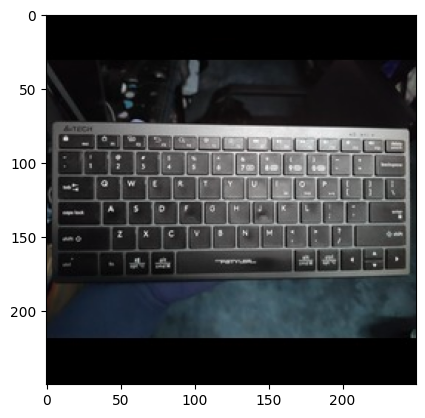

In [34]:
plt.imshow(imread(img_path))

Xception Model

In [28]:
from keras.applications import xception


xception_model = xception.Xception(weights='imagenet')
xception_model.summary()

91884032/91884032 [==============================] - 4s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [31]:
predict_image(xception_model, img_path, xception.preprocess_input, xception.decode_predictions,(299, 299))

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.877529
1,n04264628,space_bar,0.102188
2,n03793489,mouse,0.005724
3,n04505470,typewriter_keyboard,0.002552
4,n03832673,notebook,0.002016
5,n03642806,laptop,0.000470
6,n04074963,remote_control,0.000424
7,n03584254,iPod,0.000388
8,n03777754,modem,0.000234
9,n03180011,desktop_computer,0.000222


EfficientNetV2B3 Model

In [39]:
from keras.applications import efficientnet_v2

efficientnetv2b3_model = efficientnet_v2.EfficientNetV2B3(weights='imagenet')
efficientnetv2b3_model.summary()

Model: "efficientnetv2-b3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 300, 300, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 300, 300, 3)  0          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                  

In [41]:
predict_image(efficientnetv2b3_model, img_path, efficientnet_v2.preprocess_input, efficientnet_v2.decode_predictions,(300, 300))

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n04264628,space_bar,0.620834
1,n03085013,computer_keyboard,0.304702
2,n04505470,typewriter_keyboard,0.022807
3,n03832673,notebook,0.005326
4,n02992529,cellular_telephone,0.001775
5,n03485407,hand-held_computer,0.001292
6,n03793489,mouse,0.001040
7,n03642806,laptop,0.000578
8,n04074963,remote_control,0.000465
9,n04149813,scoreboard,0.000367


InceptionV3 Model

In [44]:
from keras.applications import inception_v3

inceptionv3_model = inception_v3.InceptionV3(weights='imagenet')
inceptionv3_model.summary()

96112376/96112376 [==============================] - 4s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 149, 149, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 149, 149, 32  96         ['conv2d_4[0][0]']               
 rmalization)         

In [46]:
predict_image(inceptionv3_model, img_path, inception_v3.preprocess_input, inception_v3.decode_predictions,(299, 299))

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.906502
1,n04264628,space_bar,0.057591
2,n03832673,notebook,0.005260
3,n03793489,mouse,0.003516
4,n04505470,typewriter_keyboard,0.001361
5,n03180011,desktop_computer,0.000461
6,n03584254,iPod,0.000416
7,n04074963,remote_control,0.000403
8,n03179701,desk,0.000307
9,n03777754,modem,0.000280


**Comparing the three models**
> The first model, Xception Model, has an accuracy of 87%. The second model, EfficientNetV2B3 Model, has an accuracy of 30%. And last, the InceptionV3 Model has an accuracy of 90%. In conclusion, among the three pretrained models of keras application, the most accurate to predict my keyboard image is the InceptionV3 Model with 90% accuracy.

#### Conclusion

> In this activity, I learned how to use pretrained models of keras application to predict an object. The procedure used the pretrained models VGG16 and Resnet 50, with an accuracy of around 80% on my selected image. I further explored more pretrained models in the supplementary activity, where I used Xception, EfficientNetV2B3, and InceptionV3. The least accurate among the three is the EfficientNetV2B3 Model, with a 30% accuracy. The highest accurate model, on the other hand, is the InceptionV3 Model, with a 90% accuracy.